<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

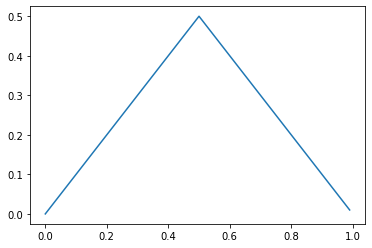

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def gini(p):
  return p*(1-p)+ (1-p)*(1-(1-p))
def entropy(p):
  return -p*np.log2(p)-(1-p)*np.log2(1-p)
def error(p):
  return 1 - np.max([p, 1 - p])
x=np.arange(0,1.0,0.01)
y=[error(m) for m in x]
plt.plot(x,y)

In [7]:
from matplotlib.colors import ListedColormap
import  matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                  alpha=0.8, c=colors[idx],
                  marker=markers[idx], label=cl,
                  edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


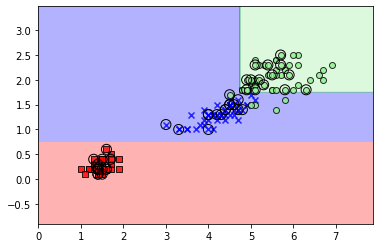

In [15]:
from sklearn import datasets
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined_std=np.hstack((y_train,y_test))
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=3, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

[Text(0.3333333333333333, 0.875, 'X[1] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.625, 'X[0] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

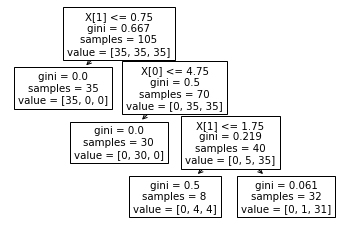

In [16]:
from sklearn import tree
tree.plot_tree(tree_model)

In [17]:
!pip install graphviz
!pip install pyparsing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

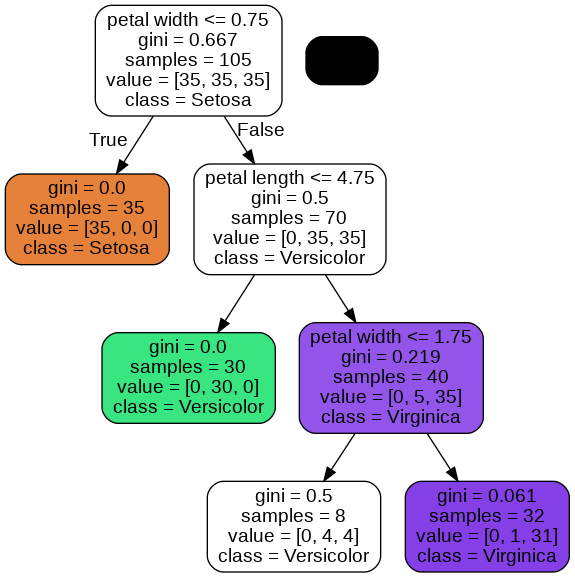

In [19]:
from IPython.display import Image
Image(filename='tree.png', width=600) 

In [20]:
x=-1/3*np.log2(1/3)*3

In [21]:
x

1.584962500721156

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


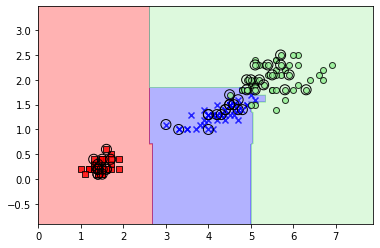

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,classifier=forest, test_idx=range(105,150))